In [1]:
from ner import *
from recurrent_models import *
from transformer_prof import *
from tqdm import tqdm

In [ ]:
embedding_sizes = [4096+2048, 8192]
vocab_size = [1000]
class_weights = [True]
paddings = ["post"]

# Total combinations of hyperparameters for tqdm progress bar
total_iterations = len(embedding_sizes) * len(vocab_size) * len(class_weights) * len(model_types) * len(paddings)

# Wrapping the outer loop with tqdm to display the total progress
with tqdm(total=total_iterations, desc="Training Models") as pbar:
    for emb_size in embedding_sizes:
        for voc_size in vocab_size:
            for clss_w in class_weights:
                for pad in paddings:
                    train_config = {'use_sample_weights': clss_w}
                    hyperparams = {
                        'vocab_size': voc_size, 
                        'embedding_dim': emb_size, 
                        'epochs': 10, 
                        'batch_size': 32
                    }

                    preprocessing_config = {'lemmatize':False, 'stem':True, 'remove_stopwords':False, 'custom_stopwords':None, 'padding':pad}

                    model = create_model("SimpleRNN_128")
                    basic = NamedEntityRecognition(
                        model, 
                        hyperparams, 
                        training_times=2, 
                        train_config=train_config, 
                        verbosing=0, 
                        name=str(emb_size),
                        results_file_name="./results/NER_emb"
                    )
                    basic.train_model()
                    basic.print_training_information()
                    
                    # Update the progress bar after each model training iteration
                    pbar.update(1)

Training Models:   0%|          | 0/64 [00:00<?, ?it/s]

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step
897
897
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step
897
897
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


Training Models:   2%|▏         | 1/64 [05:20<5:36:30, 320.48s/it]



Average Training Accuracy: 0.9866059124469757
Average Training F1: 0.2945432960987091
Average Training Loss: 0.03677341528236866
Average Validation Accuracy: 0.9802360534667969
Average Validation F1: 0.25902752578258514
Average Validation Loss: 0.12413982674479485
Best Model Validation Accuracy: 0.9805633425712585
Best Model Validation F1: 0.25802138447761536

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step
897
897
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 455ms/step
897
897
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Training Models:   3%|▎         | 2/64 [16:54<8:44:17, 507.38s/it]



Average Training Accuracy: 0.9880053699016571
Average Training F1: 0.29662127792835236
Average Training Loss: 0.033529313281178474
Average Validation Accuracy: 0.9815689027309418
Average Validation F1: 0.2615717351436615
Average Validation Loss: 0.11531758308410645
Best Model Validation Accuracy: 0.9821869134902954
Best Model Validation F1: 0.26092684268951416



In [3]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


In [9]:
from plot_functions import *
import pandas as pd
df = pd.read_csv('./results/NER_emb_average.csv')

In [9]:
df

,architecture_name,summary,average_training_acc,average_training_f1,average_training_loss,average_val_acc,average_val_f1,average_val_loss,average_tp,average_fp,...,lemmatize,stem,remove_stopwords,custom_stopwords,padding,selection_metric,f1_type,use_sample_weights,early_stopping,early_stopping_patience
0,50,"{'name': 'sequential_1', 'trainable': True, 'd...",0.903349,0.235485,0.252428,0.903083,0.205447,0.532285,1943.0,3340.0,...,False,False,False,NaN,post,accuracy,macro,True,False,5
1,128,"{'name': 'sequential_5', 'trainable': True, 'd...",0.931512,0.248204,0.136700,0.931450,0.219062,0.418236,2227.0,2344.5,...,False,False,False,NaN,post,accuracy,macro,True,False,5
2,256,"{'name': 'sequential_8', 'trainable': True, 'd...",0.954328,0.266355,0.093707,0.950584,0.233140,0.315432,2350.5,1643.0,...,False,False,False,NaN,post,accuracy,macro,True,False,5
3,512,"{'name': 'sequential_10', 'trainable': True, '...",0.971600,0.280421,0.063574,0.966143,0.244888,0.208931,2499.5,1077.5,...,False,False,False,NaN,post,accuracy,macro,True,False,5
4,1024,"{'name': 'sequential_14', 'trainable': True, '...",0.979999,0.287269,0.048778,0.973547,0.253039,0.161272,2581.5,803.0,...,False,False,False,NaN,post,accuracy,macro,True,False,5
5,2048,"{'name': 'sequential_17', 'trainable': True, '...",0.985207,0.294004,0.038718,0.979461,0.258792,0.128654,2614.5,593.0,...,False,False,False,NaN,post,accuracy,macro,True,False,5
6,3072,"{'name': 'sequential_19', 'trainable': True, '...",0.986606,0.294543,0.036773,0.980236,0.259028,0.124140,2608.0,563.5,...,False,False,False,NaN,post,accuracy,macro,True,False,5
7,4096,"{'name': 'sequential_23', 'trainable': True, '...",0.988005,0.296621,0.033529,0.981569,0.261572,0.115318,2618.0,506.0,...,False,False,False,NaN,post,accuracy,macro,True,False,5


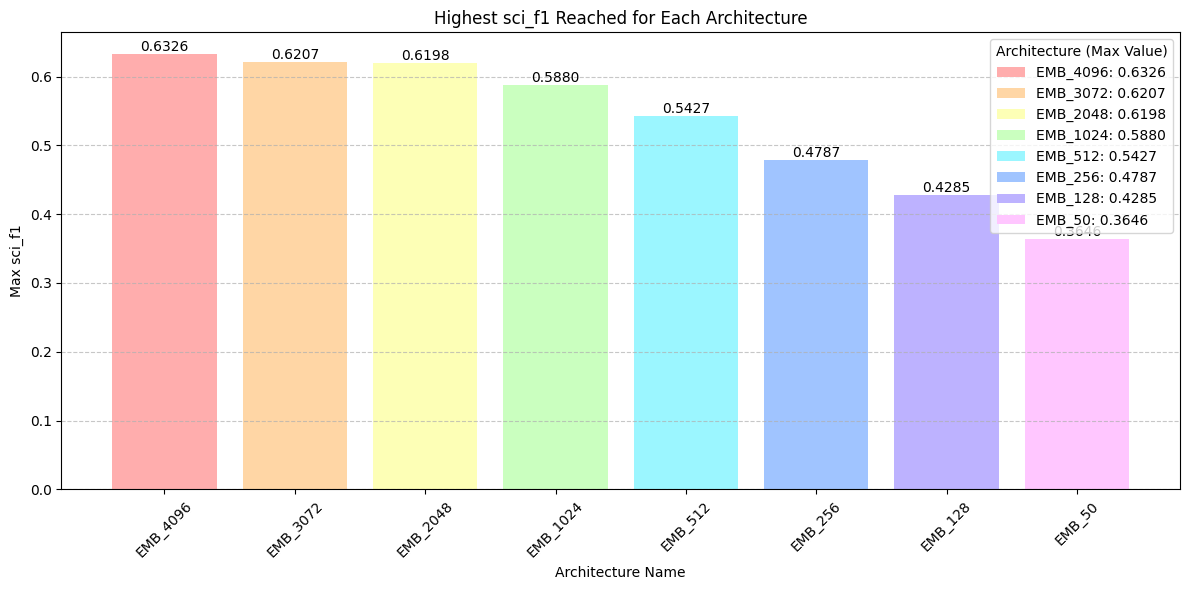

In [10]:
plot_highest_bar_old(df, metric="sci_f1")